### Import libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)

### Load the data

In [2]:
df = pd.read_csv('ECA_blended_custom/TG_STAID002759.txt', sep=",", skiprows=list(range(0,19)))
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
52711,111448,20200426,124,0
52712,111448,20200427,151,0
52713,111448,20200428,170,0
52714,111448,20200429,120,0


### Reformat columns and set date as index

In [3]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [4]:
df['TG'] = df['TG'] / 10

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y%m%d")

In [6]:
df.set_index('DATE', inplace=True)

Take slice of dataframe to avoid missing values

In [7]:
# start dataframe from first day with values after WW2
df45 = df['1945-11-06':].copy()

Plot temperature

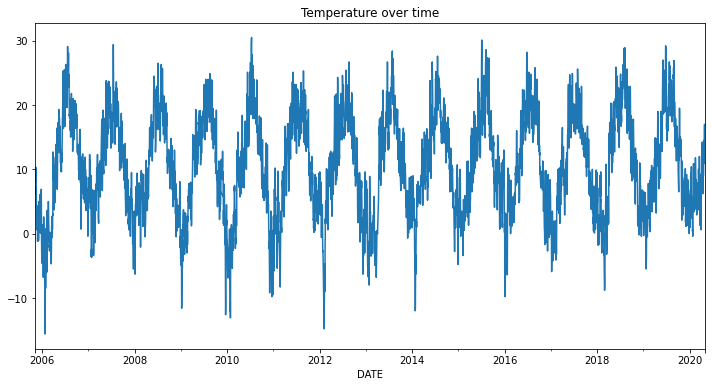

In [8]:
# to check for trends: test with linear regression and look for significance?
df45['2005-11-06':].TG.plot(figsize=(12,6), title='Temperature over time')
plt.show()

In [9]:
df45['difference'] = df45['TG'].diff()
df45.head()

,SOUID,TG,Q_TG,difference
DATE,,,,
1945-11-06,127488,7.8,0,NaN
1945-11-07,127488,6.8,0,-1.0
1945-11-08,127488,6.4,0,-0.4
1945-11-09,127488,4.0,0,-2.4
1945-11-10,127488,4.6,0,0.6


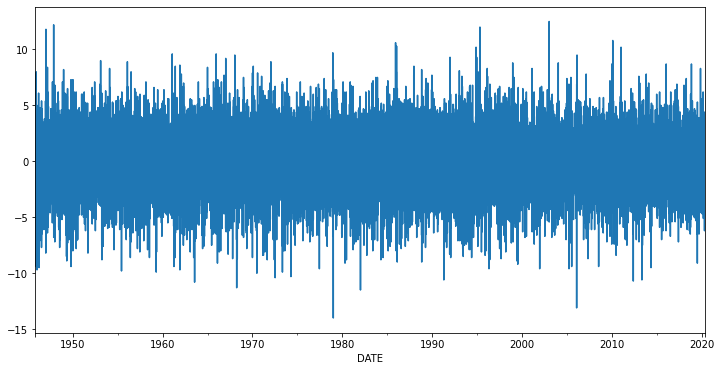

In [10]:
df45['difference'].plot()

In [11]:
df45['difference'].mean()

0.00021687987060726318

In [12]:
# How does second order differencing work?
df45['2nddifference'] = df45['difference'].diff()
df45.head()

,SOUID,TG,Q_TG,difference,2nddifference
DATE,,,,,
1945-11-06,127488,7.8,0,NaN,NaN
1945-11-07,127488,6.8,0,-1.0,NaN
1945-11-08,127488,6.4,0,-0.4,0.6
1945-11-09,127488,4.0,0,-2.4,-2.0
1945-11-10,127488,4.6,0,0.6,3.0


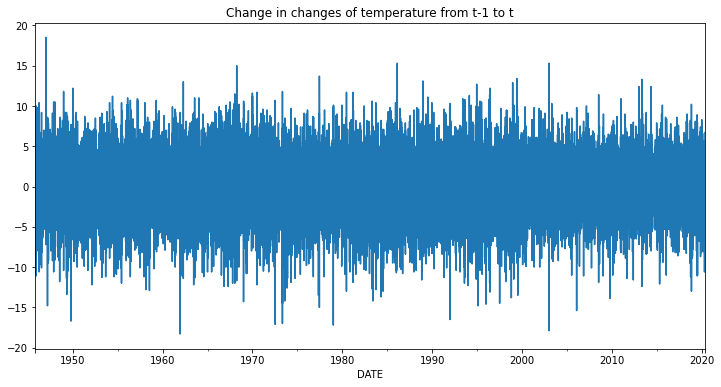

In [13]:
df45['2nddifference'].plot(figsize=(12,6), title='Change in changes of temperature from t-1 to t')

In [14]:
df45['2nddifference'].mean() # if close to 0 than trend probably linear

9.925375877660964e-05

In [15]:
df45['month'] = df45.index.month

In [16]:
df45['day_of_year'] = df45.index.dayofyear

In [17]:
# calculate the monthly mean difference of the log transformed passenger numbers
df45.groupby('day_of_year')['difference'].mean()

day_of_year
1     -0.008000
2      0.422667
3     -0.116000
4     -0.413333
5      0.048000
         ...   
362    0.020000
363   -0.696000
364   -0.509333
365   -0.408000
366    0.594444
Name: difference, Length: 366, dtype: float64

In [18]:
# Transform takes in a pd.Series and returns an array of the same length


In [19]:
# Transform takes in a pd.Series and returns an array of the same length
df45['monthly_mean'] = df45.groupby('month')['difference'].transform('mean')
df45['daily_mean'] = df45.groupby('day_of_year')['difference'].transform('mean')
df45.head()

,SOUID,TG,Q_TG,difference,2nddifference,month,day_of_year,monthly_mean,daily_mean
DATE,,,,,,,,,
1945-11-06,127488,7.8,0,NaN,NaN,11,310,-0.13975,-0.266216
1945-11-07,127488,6.8,0,-1.0,NaN,11,311,-0.13975,-0.256000
1945-11-08,127488,6.4,0,-0.4,0.6,11,312,-0.13975,-0.165333
1945-11-09,127488,4.0,0,-2.4,-2.0,11,313,-0.13975,-0.308000
1945-11-10,127488,4.6,0,0.6,3.0,11,314,-0.13975,-0.376000


In [20]:
df45['monthly_mean'].unique()

array([-0.13975045, -0.08227957, -0.00206452,  0.07843322,  0.16262366,
        0.16355556,  0.12070619,  0.07945946,  0.05963383, -0.09742807,
       -0.15900901, -0.17885789])

In [21]:
# demean the series
df45['deseasonalized_m'] = df45['difference'] - df45['monthly_mean']
df45['deseasonalized_d'] = df45['difference'] - df45['daily_mean']

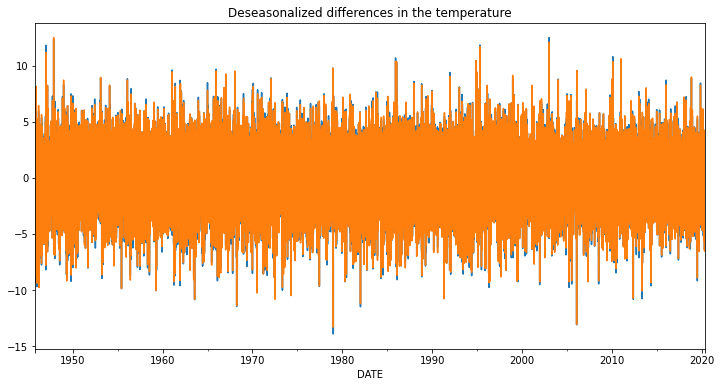

In [22]:
df45['deseasonalized_m'].plot(figsize=(12,6), title='Deseasonalized differences in the temperature')
df45['deseasonalized_d'].plot(figsize=(12,6), title='Deseasonalized differences in the temperature')

### Naive forecasting

In [23]:
df45.reset_index(inplace=True)

In [24]:
# get all Feb 29
df45.loc[845::1461]

,DATE,SOUID,TG,Q_TG,difference,2nddifference,month,day_of_year,monthly_mean,daily_mean,deseasonalized_m,deseasonalized_d
845,1948-02-29,111448,0.6,0,-0.2,-3.200000e+00,2,60,0.078433,-0.001333,-0.278433,-0.198667
2306,1952-02-29,111448,2.6,0,-0.6,5.000000e-01,2,60,0.078433,-0.001333,-0.678433,-0.598667
3767,1956-02-29,111448,3.5,0,2.1,-4.000000e-01,2,60,0.078433,-0.001333,2.021567,2.101333
5228,1960-02-29,111448,8.3,0,0.0,-4.500000e+00,2,60,0.078433,-0.001333,-0.078433,0.001333
6689,1964-02-29,111448,-0.2,0,-2.8,-2.400000e+00,2,60,0.078433,-0.001333,-2.878433,-2.798667
8150,1968-02-29,111448,-0.4,0,0.0,1.000000e-01,2,60,0.078433,-0.001333,-0.078433,0.001333
9611,1972-02-29,111448,3.2,0,-0.4,-1.200000e+00,2,60,0.078433,-0.001333,-0.478433,-0.398667
11072,1976-02-29,111448,7.7,0,-0.7,-1.500000e+00,2,60,0.078433,-0.001333,-0.778433,-0.698667
12533,1980-02-29,111448,4.0,0,5.5,4.100000e+00,2,60,0.078433,-0.001333,5.421567,5.501333
13994,1984-02-29,111448,2.2,0,-0.8,-1.200000e+00,2,60,0.078433,-0.001333,-0.878433,-0.798667


Train-test-split

In [25]:
xtrain = df45.reset_index().index.tolist()[:-365]
xtest = df45.reset_index().index.tolist()[-365:]
ytrain_d = df45['deseasonalized_d'].tolist()[:-365]
ytrain_d[0] = 0
ytest_d = df45['deseasonalized_d'].tolist()[-365:]
ytrain_m = df45['deseasonalized_m'].tolist()[:-365]
ytrain_m[0] = 0
ytest_m = df45['deseasonalized_m'].tolist()[-365:]

In [26]:
# remove February 29 from training data to make calculation of daily mean easier
# index 845 = 29.02.1948
# number of days between extra days = 1461
# index -62 = 29.02.2020
# del ytrain_d[845::1461]
# del ytrain_m[845::1461]
# del xtrain[845::1461]
# del ytest_d[-62]
# del ytest_m[-62]
# del xtest[-62]

### 1. Forecast the last value seen

In [27]:
ypred_last_d = ytrain_d[-1:] * len(xtest)
ypred_last_m = ytrain_m[-1:] * len(xtest)

### 2. Forecast the mean

In [28]:
mean_d = sum(ytrain_d) / len(ytrain_d)
ypred_mean_d = [mean_d] * len(xtest)

mean_m = sum(ytrain_m) / len(ytrain_m)
ypred_mean_m = [mean_m] * len(xtest)

### 3. Seasonal mean

In [29]:
# ypred_sm_d = []
# for i, j in enumerate(xtest):    
#     day = i % 365
#     daily_mean = sum(ytrain_d[day::365]) / len(ytrain_d[day::365])
#     ypred_sm_d.append(daily_mean)

In [30]:
ypred_sm_d = df45['daily_mean'].tolist()[-365:]

In [31]:
ypred_sm_m = df45['monthly_mean'].tolist()[-365:]

### Evaluate forecasts

Add function for MAPE

In [32]:
# from: https://stackoverflow.com/questions/47648133/mape-calculation-in-python

def mean_absolute_percentage_error(y_true, y_pred):
    """returns mape of predictions"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

naive_forecasts = {"Last value": [ypred_last_d, ypred_last_m], "Mean": [ypred_mean_d, ypred_last_m], "Seasonal mean": [ypred_sm_d, ypred_sm_m]}
seasonality = {"from daily mean": ytest_d, "from monthly mean": ytest_m}

for i in range(len(seasonality)):
    print(list(seasonality.keys())[i])
    print("\n")
    for key,value in naive_forecasts.items():
        print(key.upper())
        print("MAE: ", mean_absolute_error(list(seasonality.values())[i], value[i]))
        print("MSE: ", mean_squared_error(list(seasonality.values())[i], value[i]))
        print("R2: ", r2_score(list(seasonality.values())[i], value[i]))
        print("MAPE: ", mean_absolute_percentage_error(list(seasonality.values())[i], value[i]))
        # print("RMSLE: ", rmsle(np.log(ytest), np.log(value)))
        print("\n")

from daily mean


LAST VALUE
MAE:  2.16709776625941
MSE:  7.621856190826886
R2:  -0.3466037837694542
MAPE:  373.6968923637921


MEAN
MAE:  1.8674509016917618
MSE:  5.660062710791466
R2:  -7.44162203192289e-07
MAPE:  100.00034988701047


SEASONAL MEAN
MAE:  1.90656448229051
MSE:  5.893802806797615
R2:  -0.04129715409438406
MAPE:  152.50671410409117


from monthly mean


LAST VALUE
MAE:  2.2467673588298314
MSE:  8.078150354177025
R2:  -0.4451739477926251
MAPE:  255.98034275082503


MEAN
MAE:  2.2467673588298314
MSE:  8.078150354177025
R2:  -0.4451739477926251
MAPE:  255.98034275082503


SEASONAL MEAN
MAE:  1.8597717690059403
MSE:  5.606110371663242
R2:  -0.0029281831067295983
MAPE:  103.63208760638716




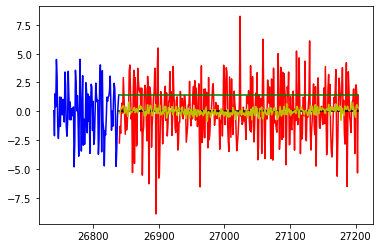

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(xtrain[-100:], ytrain_d[-100:], 'b-')
plt.plot(xtest, ytest_d, 'r-')
plt.plot(xtest, ypred_last_d, 'g-')
plt.plot(xtest, ypred_mean_d, 'k-')
plt.plot(xtest, ypred_sm_d, 'y-')

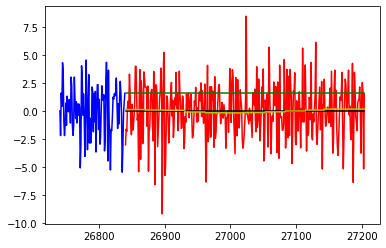

In [35]:
plt.plot(xtrain[-100:], ytrain_m[-100:], 'b-')
plt.plot(xtest, ytest_m, 'r-')
plt.plot(xtest, ypred_last_m, 'g-')
plt.plot(xtest, ypred_mean_m, 'k-')
plt.plot(xtest, ypred_sm_m, 'y-')

### Ridge Regression

In [36]:
# think about pandas .is_leap_year to find a better solution for the problem

# if you want to have the same amount of day for each year, delete feb 29
# df365 = df45.drop(df45.index[845::1461])

In [37]:
df45.set_index('DATE')

,SOUID,TG,Q_TG,difference,2nddifference,month,day_of_year,monthly_mean,daily_mean,deseasonalized_m,deseasonalized_d
DATE,,,,,,,,,,,
1945-11-06,127488,7.8,0,NaN,NaN,11,310,-0.139750,-0.266216,NaN,NaN
1945-11-07,127488,6.8,0,-1.0,NaN,11,311,-0.139750,-0.256000,-0.860250,-0.744000
1945-11-08,127488,6.4,0,-0.4,0.6,11,312,-0.139750,-0.165333,-0.260250,-0.234667
1945-11-09,127488,4.0,0,-2.4,-2.0,11,313,-0.139750,-0.308000,-2.260250,-2.092000
1945-11-10,127488,4.6,0,0.6,3.0,11,314,-0.139750,-0.376000,0.739750,0.976000
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-26,111448,12.4,0,1.5,5.1,4,117,0.163556,-0.513333,1.336444,2.013333
2020-04-27,111448,15.1,0,2.7,1.2,4,118,0.163556,0.404000,2.536444,2.296000
2020-04-28,111448,17.0,0,1.9,-0.8,4,119,0.163556,0.570667,1.736444,1.329333


In [38]:
df45.fillna(method='bfill', inplace=True)

In [39]:
LAGS = 10

for i in range(1,LAGS):
    df45[f'{i}_shift_st_p'] = df45.deseasonalized_m.shift(i)

In [40]:
df45 = df45.fillna(method='bfill')

In [41]:
sns.heatmap(df45.drop([x for x in df45.columns if 'st' not in x], axis=1).corr().abs())

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df45.deseasonalized_m, lags=[x for x in range(1,11)]) #take time lags outside the blue area with high correlation, for best results
None

In [43]:
features = [f"{x}_shift_st_p" for x in range(1, LAGS)]

xtrain = df45[features][:-365]
xtest = df45[features][-365:]
ytrain = df45['deseasonalized_m'][:-365]
ytest = df45['deseasonalized_m'][-365:]

(0.07692791129117571, 0.11333220685500434)

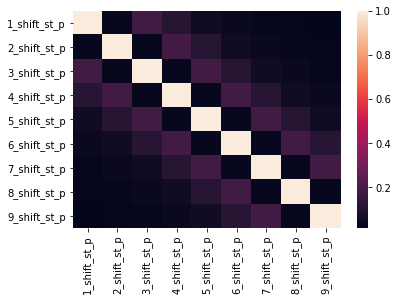

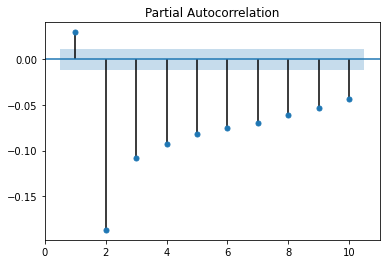

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model.fit(xtrain, ytrain)
model.score(xtrain, ytrain), model.score(xtest, ytest)

In [45]:
ypred = model.predict(xtest)

In [46]:
from statsmodels.tsa.ar_model import AutoReg


for i in range(1,21):
    m = AutoReg(ytrain, lags=i)
    res = m.fit()
    print(f"lag: {i}, ", res.aic)


lag: 1,  1.737385633249413
lag: 2,  1.7023687450584075
lag: 3,  1.690800900866249
lag: 4,  1.6823095859914634
lag: 5,  1.6756660284584952
lag: 6,  1.6700457077590534
lag: 7,  1.6652739783348056
lag: 8,  1.6617625453206417
lag: 9,  1.6589250992383187
lag: 10,  1.6571963893286261
lag: 11,  1.6543339898816536
lag: 12,  1.6520014901049176
lag: 13,  1.6497720669805007
lag: 14,  1.647739716866183
lag: 15,  1.6460930032158214
lag: 16,  1.6434244153077049
lag: 17,  1.6419409731230612
lag: 18,  1.640489786759493
lag: 19,  1.6396234749782548
lag: 20,  1.6378258116105633


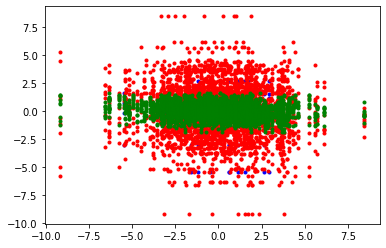

In [47]:
plt.plot(xtrain[-10:], ytrain[-10:], 'b.')
plt.plot(xtest, ytest, 'r.')
plt.plot(xtest, ypred, 'g.')

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE: ", mean_absolute_error(ytest, ypred))
print("MSE: ", mean_squared_error(ytest, ypred))
print("R2: ", r2_score(ytest, ypred))
print("MAPE: ", mean_absolute_percentage_error(ytest, ypred))

MAE:  1.7519991520621896
MSE:  4.956244719310017
R2:  0.11333220685500434
MAPE:  125.56833181351344


In [49]:
# from plotly.plotly import plot_mpl
# from statsmodels.tsa.seasonal import seasonal_decompose


# result = seasonal_decompose(ytrain, model='multiplicative')
# fig = result.plot()
# plot_mpl(fig)

In [50]:
from statsmodels.tsa.arima_model import ARIMA

### Three parameters to ARIMA:
* p - autoregressive part (regression on the X data, 0 to 3)
* d - differencing (0 or 1)
* q - moving average part (of the residuals!!, 0 to 3)

In [75]:
# Stefan's Walk-Forward

fc_1d = []
fc_2d = []
fc_3d = []
for i in range(367):
    # reinitialize the model
    if i < 2:
        ytrain_arima = ytrain[-10000:-2-i]
    else:
        ytrain_arima = pd.concat([ytrain[-10000:],ytest[:i-2]])
    m = ARIMA(ytrain_arima, (5, 0, 0))
    m.initialize()
    r = m.fit()
    # do a forecast 3 periods ahead
    ypred, err, conf = r.forecast(steps=3) # predicted, error, confidence
    # collect the last forecasted point
    if i == 0:
        fc_3d.append(ypred[2])
    elif i == 1:
        fc_2d.append(ypred[1])
        fc_3d.append(ypred[2])
    elif i >= 2 & i < 365:
        fc_1d.append(ypred[0])
        fc_2d.append(ypred[1])
        fc_3d.append(ypred[2])
    elif i == 365:
        fc_1d.append(ypred[0])
        fc_2d.append(ypred[1])
    elif i == 366:
        fc_1d.append(ypred[0])

In [105]:
# len(fc_1d), len(fc_2d), len(fc_3d)

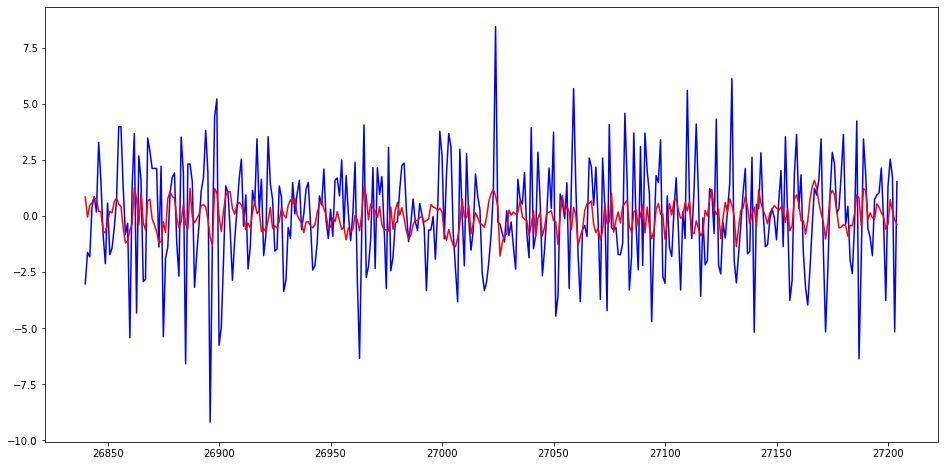

In [100]:
plt.figure(figsize=(16,8))
plt.plot(ytest[:365], 'b-')
# plt.plot(range(26840, 26845), ypred, 'r-')
plt.plot(range(26840, 27205), fc_1d[:365], 'r-')
# plt.plot(range(26840, 27205), fc_2d[:365], 'y-')
# plt.plot(range(26840, 27205), fc_3d[:365], 'g-')

In [78]:
print("MAE: ", mean_absolute_error(ytest, fc_1d))
print("MSE: ", mean_squared_error(ytest, fc_1d))
print("R2: ", r2_score(ytest, fc_1d))
print("MAPE: ", mean_absolute_percentage_error(ytest, fc_1d))

MAE:  1.7446248967342368
MSE:  4.996551948464996
R2:  0.10612127923809467
MAPE:  120.92058933536319


Reconstruction

In [101]:
fc_1d = fc_1d[:365] + df45[26840:]['monthly_mean']
# fc_2d = fc_2d[:365] + df45[26840:]['monthly_mean']
# fc_3d = fc_3d[:365] + df45[26840:]['monthly_mean']

In [88]:
fc_temps_1d = []
# fc_temps_2d = []
# fc_temps_3d = []
for i in range(365):
    fc_temp_1d = df45.loc[df45.index[26839 + i],'TG'] + fc_1d[26840 + i]
    fc_temps_1d.append(fc_temp_1d)
#     fc_temp_2d = df45.loc[df45.index[26839 + i],'TG'] + fc_2d[26840 + i]
#     fc_temps_2d.append(fc_temp_2d)
#     fc_temp_3d = df45.loc[df45.index[26837 + i],'TG'] + fc_3d[26840 + i]
#     fc_temps_3d.append(fc_temp_3d)

In [89]:
# fc = np.cumsum(fc)

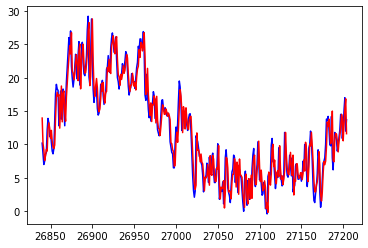

In [103]:
plt.plot(range(26840, 27205), df45[26840:]['TG'], 'b-')
plt.plot(range(26840, 27205), fc_temps_1d[:365], 'r-')
# plt.plot(range(26840, 27205), fc_temps_2d[:365], 'y-')
# plt.plot(range(26840, 27205), fc_temps_3d[:365], 'g-')

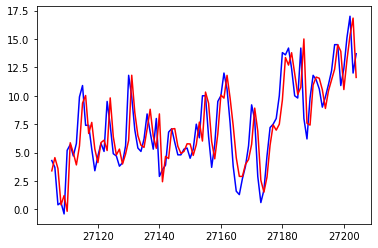

In [104]:
plt.plot(range(27105, 27205), df45[27105:]['TG'], 'b-')
plt.plot(range(27105, 27205), fc_temps_1d[265:365], 'r-')
# plt.plot(range(27105, 27205), fc_temps_2d[265:365], 'y-')
# plt.plot(range(27105, 27205), fc_temps_3d[265:365], 'g-')

In [102]:
predictions = {"1-day": fc_temps_1d} # "2-day": fc_temps_2d, "3-day": fc_temps_3d

for prediction in predictions:
    print(prediction)
    print("MAE: ", mean_absolute_error(df45[26840:]['TG'], predictions[prediction][:365]))
    print("MSE: ", mean_squared_error(df45[26840:]['TG'], predictions[prediction][:365]))
    print("R2: ", r2_score(df45[26840:]['TG'], predictions[prediction][:365]))
    # print("MAPE: ", mean_absolute_percentage_error(df45[26840:]['TG'], fc_temps[:365]))

1-day
MAE:  1.7446248967342368
MSE:  4.9965519484649965
R2:  0.9006143566176507


### Train on whole data set